In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
from pmdarima.arima import auto_arima

In [54]:
df_laptop = pd.read_csv("keyword_and_lag_search_analytics_data1.csv")
df_laptop = df_laptop.iloc[0:138]

#Converting data into DateTime format
df_laptop['date'] = pd.to_datetime(df_laptop['date'], infer_datetime_format = True)
df_laptop = df_laptop.set_index(['date'])

In [55]:
df_laptop

,Sales,lenovo legion,lenovo laptops,lenovo,gaming laptops,legion laptop,lenovo gaming laptops,lenovo legion laptop,lenovo laptop,best laptops,...,is_month_start,is_month_end,SMA_3,SMA_4,SMA_5,Sales_month,Sales_qtr,contri_week_month,contri_week_quarter,SI_Quarter_week
date,,,,,,,,,,,,,,,,,,,,,
2018-01-07,3.102734e+05,28,69,100,62,28,35,30,48,61,...,0,0,0.000000e+00,0.000000e+00,0.000,1672106.384,5.647214e+06,0.185558,0.054943,0.656799
2018-01-14,5.774019e+05,27,66,96,59,27,51,32,46,60,...,0,0,0.000000e+00,0.000000e+00,0.000,1672106.384,5.647214e+06,0.345314,0.102245,0.860645
2018-01-21,4.059437e+05,27,66,94,60,26,46,26,46,57,...,0,0,0.000000e+00,0.000000e+00,0.000,1672106.384,5.647214e+06,0.242774,0.071884,0.769455
2018-01-28,3.784874e+05,26,67,95,69,19,51,22,46,59,...,0,0,4.312063e+05,0.000000e+00,0.000,1672106.384,5.647214e+06,0.226354,0.067022,0.654300
2018-02-04,4.607665e+05,24,64,88,61,23,45,25,45,54,...,0,0,4.539443e+05,4.180266e+05,0.000,2376650.170,5.647214e+06,0.193872,0.081592,0.589324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-26,1.662375e+06,84,83,77,72,85,74,86,83,82,...,0,0,1.918020e+06,1.858023e+06,1909535.733,7416435.044,1.548428e+07,0.224147,0.107359,1.361488
2020-08-02,1.934459e+06,86,83,79,70,92,90,88,89,88,...,0,0,1.954986e+06,1.854109e+06,1818893.531,8067844.580,1.548428e+07,0.239774,0.124930,1.641888
2020-08-09,2.327555e+06,87,86,80,61,86,65,86,89,85,...,0,0,1.784856e+06,1.949854e+06,1870178.719,8067844.580,1.548428e+07,0.288498,0.150317,1.893072


In [77]:
dsdata = df_laptop[['Sales']]
dsdata

,Sales
date,
2018-01-07,3.102734e+05
2018-01-14,5.774019e+05
2018-01-21,4.059437e+05
2018-01-28,3.784874e+05
2018-02-04,4.607665e+05
...,...
2020-07-26,1.662375e+06
2020-08-02,1.934459e+06
2020-08-09,2.327555e+06


In [78]:
automodel1 = auto_arima(dsdata)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-p

In [79]:
automodel1

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [80]:
automodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  138
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1972.755
Date:                Thu, 11 Aug 2022   AIC                           3953.509
Time:                        11:22:05   BIC                           3965.189
Sample:                             0   HQIC                          3958.256
                                - 138                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2886      0.187      1.542      0.123      -0.078       0.656
ma.L1         -0.3852      0.158     -2.446      0.014      -0.694      -0.077
ma.L2         -0.4721      0.072     -6.571      0.000      -0.613      -0.331
sigma2      2.052e+11   5.75e-13   3.57e+23      0.000    2.05e+11    2.05e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              6014.66
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               6.10   Skew:                             4.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+40. Standard errors may be unstable.
"""

In [60]:
automodel2 = auto_arima(dsdata, m = 52)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-p

In [81]:
automodel2

ARIMA(order=(1, 0, 2), scoring_args={}, seasonal_order=(1, 1, 0, 52),
      suppress_warnings=True)

In [62]:
automodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  138
Model:             SARIMAX(1, 0, 2)x(1, 1, [], 52)   Log Likelihood               -1252.026
Date:                             Thu, 11 Aug 2022   AIC                           2516.053
Time:                                     10:31:19   BIC                           2530.779
Sample:                                          0   HQIC                          2521.979
                                             - 138                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.684e+05   4.04e+05      0.664      0.507   -5.24e+05    1.06e+06
ar.L1          0.7413      0.376      1.971      0.049       0.004       1.479
ma.L1          0.1638      0.469      0.349      0.727      -0.756       1.084
ma.L2         -0.2606      0.371     -0.703      0.482      -0.987       0.466
ar.S.L52      -0.9784      0.219     -4.467      0.000      -1.408      -0.549
sigma2      3.155e+11      1.286   2.45e+11      0.000    3.16e+11    3.16e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3390.89
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                             4.34
Prob(H) (two-sided):                  0.16   Kurtosis:                        32.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.57e+28. Standard errors may be unstable.
"""

In [82]:
sarimaxmodel1 = SARIMAX(dsdata, order = (1, 0, 2), seasonal_order = (1, 1, 0, 52))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [83]:
res_sar1 = sarimaxmodel1.fit(disp = False)
res_sar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                  138
Model:             SARIMAX(1, 0, 2)x(1, 1, [], 52)   Log Likelihood               -1255.475
Date:                             Thu, 11 Aug 2022   AIC                           2520.949
Time:                                     11:22:24   BIC                           2533.221
Sample:                                 01-07-2018   HQIC                          2525.888
                                      - 08-23-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9693      0.055     17.641      0.000       0.862       1.077
ma.L1         -0.0500      0.236     -0.212      0.832      -0.513       0.413
ma.L2         -0.4116      0.107     -3.862      0.000      -0.621      -0.203
ar.S.L52      -0.8589      0.212     -4.055      0.000      -1.274      -0.444
sigma2        3.4e+11   1.53e-12   2.22e+23      0.000     3.4e+11     3.4e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2777.19
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                             3.83
Prob(H) (two-sided):                  0.08   Kurtosis:                        29.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.02e+38. Standard errors may be unstable.
"""

/var/folders/ly/0p8twhl93yvfxfd5nqs2jjlm0000gn/T/ipykernel_31451/1924938819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsdata['forecast'] = res_sar1.predict(start=104,end=138,dynamic=False)


<AxesSubplot:xlabel='date'>

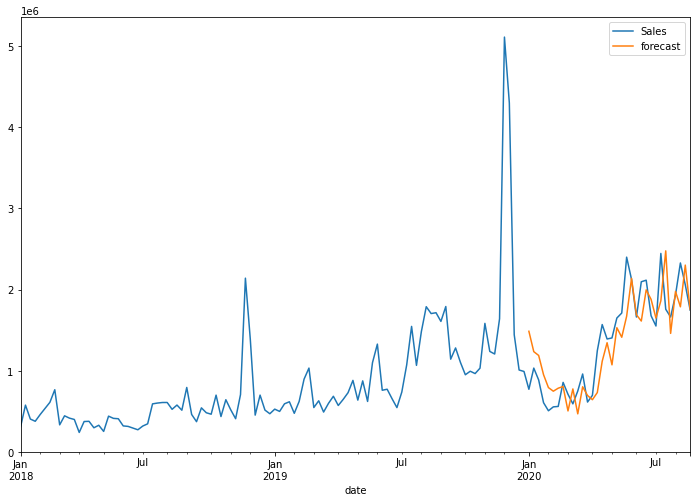

In [89]:
dsdata['forecast'] = res_sar1.predict(start=104,end=138,dynamic=False)
dsdata[['Sales', 'forecast']].plot(figsize=(12,8))

In [91]:
dsallvdata = df_laptop[['lenovo legion', 'legion laptop', 'lenovo legion laptop', 'lenovo laptop', 'legion gaming laptop', 'lenovo gaming laptop', 'lenovo legion 5_x', 'legion y520', 'lenovo legion y520', 'lenovo y520', 'lenovo legion 5_y', 'lenovo legion y545', 'legion y740', 'legion y530', 'legion y540', 'lenovo y540', 'lenovo legion y540', 'lenovo legion y530', 'legion 5 pro', 'lenovo legion y740', 'lenovo legion 5 pro', 'lenovo legion y7000', 'lenovo ideapad', 'msi laptop', 'legion 5i', 'razer laptop', 'gaming laptops', 'lenovo gaming laptops', 'lenovo laptops', 'lenovo', 'asus', 'hp', 'msi gaming laptop', 'best laptops', 'gaming laptop', 'best gaming laptops', 'dell laptops', 'asus laptops', 'best gaming laptop', 'laptops for gaming', 'good laptops', 'hp laptops', 'gaming laptops under 1000', 'reddit gaming laptops', 'gaming laptop', 'good laptops for gaming']]
dsallvdata

,lenovo legion,legion laptop,lenovo legion laptop,lenovo laptop,legion gaming laptop,lenovo gaming laptop,lenovo legion 5_x,legion y520,lenovo legion y520,lenovo y520,...,dell laptops,asus laptops,best gaming laptop,laptops for gaming,good laptops,hp laptops,gaming laptops under 1000,reddit gaming laptops,gaming laptop,good laptops for gaming
date,,,,,,,,,,,,,,,,,,,,,
2018-01-07,28,28,30,48,27,42,3,96,90,99,...,74,66,46,50,53,77,44,51,45,34
2018-01-14,27,27,32,46,24,41,4,92,89,94,...,75,63,39,42,48,80,70,14,44,21
2018-01-21,27,26,26,46,24,39,2,92,92,96,...,73,62,43,56,51,78,32,50,42,39
2018-01-28,26,19,22,46,24,43,4,86,85,92,...,74,63,49,68,55,78,55,23,44,48
2018-02-04,24,23,25,45,24,41,3,81,81,88,...,72,54,45,60,58,66,60,23,44,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-26,84,85,86,83,94,96,87,24,24,26,...,99,92,89,84,91,91,39,79,92,79
2020-08-02,86,92,88,89,89,91,79,22,21,22,...,100,94,77,84,99,94,39,35,85,77
2020-08-09,87,86,86,89,83,81,94,25,26,27,...,98,91,81,79,96,94,24,46,83,83


In [97]:
from sklearn import linear_model

regr1 = linear_model.LinearRegression()
regr1.fit(dsallvdata, dsdata['Sales'])

dsallvdata = sm.add_constant(dsallvdata) # adding a constant
 
model1 = sm.OLS(dsdata['Sales'], dsallvdata).fit()
predictions1 = model1.predict(dsallvdata) 
 
print_model1 = model1.summary()
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     5.327
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           6.49e-12
Time:                        11:53:03   Log-Likelihood:                -1967.8
No. Observations:                 138   AIC:                             4026.
Df Residuals:                      93   BIC:                             4157.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [118]:
#Creating forward stepwise model for significant variable selection

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

sfs1 = sfs(regr1, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(dsallvdata, dsdata['Sales'])

feat_names = list(sfs1.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.3s finished

[2022-08-11 12:45:24] Features: 1/10 -- score: -289402436796.01624[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.3s finished

[2022-08-11 12:45:24] Features: 2/10 -- score: -275965061288.14325[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished

[2022-08-11 12:45:24] Features: 3/10 -- score: -267677854967.6206[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

['const', 'legion y530', 'lenovo y540', 'lenovo legion y530', 'gaming laptops', 'lenovo laptops', 'asus', 'hp', 'msi gaming laptop', 'best gaming laptops']


[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.3s finished

[2022-08-11 12:45:26] Features: 10/10 -- score: -247900775140.43085

In [119]:
#Creating backward stepwise model for significant variable selection

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

sfs2 = sfs(regr1, k_features=10, forward=False, verbose=2, scoring='neg_mean_squared_error')
sfs2 = sfs2.fit(dsallvdata, dsdata['Sales'])

feat_names = list(sfs2.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.4s finished

[2022-08-11 12:58:18] Features: 46/10 -- score: -14643967646169.682[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.4s finished

[2022-08-11 12:58:19] Features: 45/10 -- score: -2279061568935.328[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.5s finished

[2022-08-11 12:58:19] Features: 44/10 -- score: -526481419321.0994[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished

[2022-08-11 12:58:26] Features: 19/10 -- score: -347490103305.4145[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished

[2022-08-11 12:58:26] Features: 18/10 -- score: -353311707491.211[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2022-08-11 12:58:27] Features: 17/10 -- score: -361565842514.4296[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s finished

[2022-08-11 12:58:27] Features: 16/1

['lenovo gaming laptop', 'lenovo y520', 'lenovo legion y545', 'legion y540', 'lenovo legion y530', 'lenovo ideapad', 'msi laptop', 'lenovo', 'best laptops', 'gaming laptop']


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2022-08-11 12:58:27] Features: 11/10 -- score: -322322076464.6113[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-08-11 12:58:27] Features: 10/10 -- score: -307625867472.80115

In [121]:
#Creating floating backward stepwise model for significant variable selection

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

sfs3 = sfs(regr1, k_features=10, forward=False, floating=True, verbose=2, scoring='neg_mean_squared_error')
sfs3 = sfs3.fit(dsallvdata, dsdata['Sales'])

feat_names = list(sfs3.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.5s finished

[2022-08-11 12:59:30] Features: 46/10 -- score: -14643967646169.682[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-08-11 12:59:31] Features: 45/10 -- score: -2279061568935.328[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n

[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished

[2022-08-11 12:59:37] Features: 31/10 -- score: -365196209460.751[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished

[2022-08-11 12:59:43] Features: 23/10 -- score: -350311661553.8252[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished

[2022-08-11 12:59:44] Features: 22/10 -- score: -355649066628.0658[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.2s finished

[2022-08-11 12:59:50] Features: 18/10 -- score: -347498224431.0685[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.3s finished

[2022-08-11 12:59:50] Features: 18/10 -- score: -339481001558.33124[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]:

[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.3s finished

[2022-08-11 12:59:57] Features: 18/10 -- score: -312996864355.0485[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.3s finished

[2022-08-11 13:00:04] Features: 12/10 -- score: -312986274939.26526[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.3s finished

[2022-08-11 13:00:04] Features: 12/10 -- score: -312709580288.1873[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]:

['lenovo y520', 'lenovo legion y545', 'legion y540', 'lenovo ideapad', 'gaming laptops', 'lenovo', 'asus', 'msi gaming laptop', 'best laptops', 'asus laptops']


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.3s finished

[2022-08-11 13:00:05] Features: 10/10 -- score: -317030453677.92316

In [127]:
varbest7 = dsallvdata[['lenovo y520', 'lenovo legion y545', 'lenovo ideapad', 'gaming laptops', 'lenovo', 'msi gaming laptop', 'best laptops']]

regr2 = linear_model.LinearRegression()
regr2.fit(varbest7, dsdata['Sales'])

varbest7 = sm.add_constant(varbest7) # adding a constant
 
model2 = sm.OLS(dsdata['Sales'], varbest7).fit()
predictions2 = model2.predict(varbest7) 
 
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     28.00
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           3.51e-23
Time:                        13:09:33   Log-Likelihood:                -1991.2
No. Observations:                 138   AIC:                             3998.
Df Residuals:                     130   BIC:                             4022.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.296e+06   4.84

In [152]:
dssigvar = df_laptop[['Sales', 'lenovo y520', 'lenovo legion y545', 'lenovo ideapad', 'gaming laptops', 'lenovo', 'msi gaming laptop', 'best laptops']]

In [156]:
automodel3 = auto_arima(dssigvar['Sales'], exogenous = dssigvar[['lenovo y520', 'best laptops', 'lenovo ideapad']], m = 52)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-p

In [157]:
automodel3

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(1, 1, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [158]:
automodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  138
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 52)   Log Likelihood               -1253.992
Date:                             Thu, 11 Aug 2022   AIC                           2519.984
Time:                                     23:45:30   BIC                           2534.710
Sample:                                 01-07-2018   HQIC                          2525.911
                                      - 08-23-2020                                         
Covariance Type:                               opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
lenovo y520    -1.506e+04   4854.059     -3.103      0.002   -2.46e+04   -5546.243
best laptops     4.06e+04   8765.444      4.631      0.000    2.34e+04    5.78e+04
lenovo ideapad  -1.14e+04   1.13e+04     -1.010      0.313   -3.35e+04    1.07e+04
ma.L1              0.5776      0.102      5.669      0.000       0.378       0.777
ar.S.L52          -0.8555      0.333     -2.567      0.010      -1.509      -0.202
sigma2          3.293e+11      0.005   6.25e+13      0.000    3.29e+11    3.29e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2450.69
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.87   Skew:                             3.98
Prob(H) (two-sided):                  0.01   Kurtosis:                        27.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+29. Standard errors may be unstable.
"""

In [135]:
sarimaxmodel2 = SARIMAX(dssigvar['Sales'], order = (0, 0, 1), seasonal_order = (0, 0, 0, 52), 
                        exog = dssigvar[['lenovo y520', 'lenovo ideapad', 'lenovo', 'best laptops']])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [133]:
res_sar2 = sarimaxmodel2.fit(disp = False)
res_sar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  138
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1981.613
Date:                Thu, 11 Aug 2022   AIC                           3975.226
Time:                        13:25:53   BIC                           3992.790
Sample:                    01-07-2018   HQIC                          3982.364
                         - 08-23-2020                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
lenovo y520    -1.859e+04   4302.694     -4.321      0.000    -2.7e+04   -1.02e+04
lenovo ideapad -1.721e+04   4024.435     -4.275      0.000   -2.51e+04   -9318.095
lenovo          7578.5696   8215.353      0.922      0.356   -8523.226    2.37e+04
best laptops     3.82e+04   8786.127      4.347      0.000     2.1e+04    5.54e+04
ma.L1              0.5607      0.052     10.798      0.000       0.459       0.663
sigma2          1.779e+11      0.003   6.36e+13      0.000    1.78e+11    1.78e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              6550.62
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               8.22   Skew:                             4.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.67e+29. Standard errors may be unstable.
"""

In [140]:
dssigvar['forecast'] = res_sar2.predict(start=104,end=138,dynamic=False, exog = self._validate_out_of_sample_exog(exog, out_of_sample))
dssigvar[['Sales', 'forecast']].plot(figsize=(12,8))

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.